In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [54]:
df.sample(1)

,Unnamed: 0,TV,Radio,Newspaper,Sales
186,187,139.5,2.1,26.6,10.3


In [6]:
df.info

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


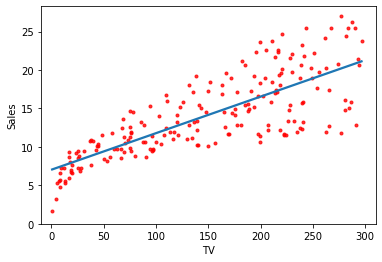

In [10]:
sns.regplot(df.TV, df.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9}) 
plt.xlim(-10,310)
plt.ylim(bottom=0)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


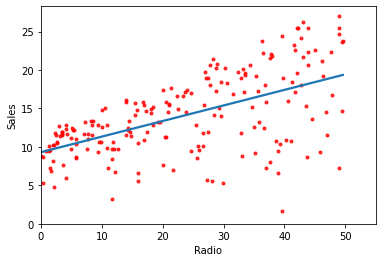

In [11]:
sns.regplot(df.Radio, df.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9}) 
plt.xlim(0,55) 
plt.ylim(bottom=0)
plt.show() 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


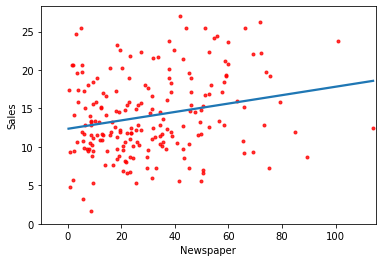

In [13]:
sns.regplot(df.Newspaper, df.Sales, order=1, ci=None,scatter_kws={'color':'r', 's':9}) 
plt.xlim(-10,115) 
plt.ylim(bottom=0) 
plt.show() 

In [15]:
from sklearn.preprocessing import scale
X = scale(df.TV, with_mean=True, with_std=False).reshape(-1,1)
y = df.Sales

In [16]:
X[0:5]

array([[  83.0575],
       [-102.5425],
       [-129.8425],
       [   4.4575],
       [  33.7575]])

In [17]:
X.mean()

1.0089706847793422e-14

In [18]:
X.std()

85.63933175679269

In [19]:
import sklearn.linear_model as skl_lm
regr = skl_lm.LinearRegression()

In [20]:
regr.fit(X,y)

LinearRegression()

In [21]:
regr.intercept_

14.0225

In [22]:
regr.coef_

array([0.04753664])

In [23]:
min_rss = np.sum((regr.intercept_+regr.coef_*X-y.values.reshape(-1,1))**2)

In [24]:
min_rss

2102.5305831313512

## Using sklearn

In [28]:
from sklearn.linear_model import LinearRegression
regr= skl_lm.LinearRegression()
X= df.TV.values.reshape(-1,1)
y= df.Sales
regr.fit(X,y)
LinearRegression()


LinearRegression()

In [29]:
regr.intercept_

7.032593549127694

In [30]:
regr.coef_

array([0.04753664])

## RSS

In [32]:
min_rss= np.sum((regr.intercept_+regr.coef_*X-y.values.reshape(-1,1))**2)
min_rss

2102.5305831313517

## MSE 

In [35]:
mse= min_rss/len(y)
mse

10.512652915656759

## R-Sq using sklearn 

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
Sales_pred= regr.predict(X)

In [40]:
r2_score(y,Sales_pred)


0.611875050850071

## MSE using SKLearn

In [41]:
mean_squared_error(y, Sales_pred)

10.512652915656759

In [43]:
import statsmodels.formula.api as smf
est= smf.ols('Sales ~ TV', df).fit()


In [44]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.47e-42
Time:                        15:03:08   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regression RSS and MSE 

In [45]:
est.params

Intercept    7.032594
TV           0.047537
dtype: float64

## RSS

In [46]:
((df.Sales - (est.params[0] + est.params[1] * df.TV))** 2).sum()

2102.530583131351

## MSE 

In [48]:
((df.Sales- (est.params[0] + est.params[1]*df.TV))** 2).sum()/len(df.Sales)

10.512652915656753

## Linear Regression Sals and Radio

In [49]:
est = smf.ols('Sales ~ Radio', df).fit()

In [50]:
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243


## Linear Regression Sales and Newspaper

In [51]:
est = smf.ols('Sales ~ Newspaper', df).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


# Multi linear Regression

In [52]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.58e-96
Time:                        15:11:08   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [75]:
# import numpy as np

# class MultilinearRegression:
    
#     def __init__(self, alpha=0.01, num_iterations=1000):
#         self.alpha = alpha
#         self.num_iterations = num_iterations
#         self.theta = None
    
#     def fit(self, X, y):
#         m = X.shape[0] # number of training examples
#         n = X.shape[1] # number of features
#         self.theta = np.zeros(n + 1) # initialize theta with zeros
#         X = np.insert(X, 0, 1, axis=1) # add column of 1's for intercept term
        
#         # gradient descent algorithm
#         for i in range(self.num_iterations):
#             # calculate predicted values
#             predictions = X.dot(self.theta)
#             # calculate errors
#             errors = predictions - y
#             # calculate gradient
#             gradient = (1/m) * X.T.dot(errors)
#             # update theta
#             self.theta = self.theta - self.alpha * gradient
    
#     def predict(self, X_test):
#         X_test = np.insert(X, 0, 1, axis=1) # add column of 1's for intercept term
#         predictions = X.dot(self.theta)
#         return predictions

In [76]:
X.shape

(200, 1)

In [77]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [78]:
lr = MultilinearRegression()

In [79]:
lr.fit(X,y)

C:\Users\HP\AppData\Local\Temp/ipykernel_15448/1040542648.py:25: RuntimeWarning: invalid value encountered in subtract
  self.theta = self.theta - self.alpha * gradient


In [80]:
X.shape

(200, 1)

In [81]:
np.insert(X,0,1,axis=1).shape

(200, 2)

In [83]:
# y_pred = lr.predict(X_test)

In [87]:
class MeraLR:
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X,y):
        X = np.insert(X,0,1,axis=1)
        
        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred
        

In [88]:
lr = MeraLR()

In [89]:
lr.fit(X,y)

In [91]:
X.shape

(200, 1)

In [93]:
np.insert(X,0,1,axis=1).shape


(200, 2)

In [95]:
y_pred = lr.predict(X)

In [96]:
r2_score(y,y_pred)

0.611875050850071

In [97]:
lr.coef_

array([0.04753664])

In [98]:
lr.intercept_

7.032593549127707